# **Comparative Analysis of Smartphone Offerings: Jumia vs Tunisianet**


# 1.Introduction :

In the Tunisian e-commerce landscape, Jumia and Tunisianet are two major players offering a wide range of electronic products, including smartphones. These two companies are recognized for their online presence and commitment to providing quality products to Tunisian consumers.<br>

Given the competitive offering of smartphones, it becomes essential for consumers to compare the different brands and models available on these platforms. This project aims to conduct an in-depth comparison of smartphones offered by Jumia and Tunisianet. Through web scraping techniques (Beautiful Soup package), we have collected data on prices, technical specifications, and other relevant information on smartphones available on both sites. By using Exploratory Data Analysis, we will explore this data, identify trends, differences, and strengths of each company, to assist Tunisian consumers in making informed decisions when purchasing a smartphone.

In [1]:
# Import libraries
!pip3 install requests BeautifulSoup4

Defaulting to user installation because normal site-packages is not writeable


In [2]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns


In [3]:
# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (23,10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# 2.scraping data from tunisianet :

## 2.1.Scraping Data :

In this phase, we will gather data from the Tunisianet website using web scraping with Beautiful Soup. By extracting information such as prices, specifications, brands, and models of smartphones, we aim to create a comprehensive dataset for analysis.

In [4]:
### tunisianet
l1=[]
NAME=[]
CARACTERISTIQUE=[]
PRICE=[]
URL=[]
for i in range(1,10):
    tunisianet = requests.get("https://www.tunisianet.com.tn/596-smartphone-mobile-4g-tunisie?page="+str(i)).text
    soup=BeautifulSoup(tunisianet,'lxml')
    elts=soup.find_all('article', class_ = 'product-miniature js-product-miniature col-xs-12 propadding')
    
    

    for elt in elts:
        url=elt.find('img',attrs={'class':'center-block img-responsive'})['src']
        info=elt.find('h2', class_ = 'h3 product-title').text.split('/')
        price = elt.find('span', class_ = 'price')
        if ((info[0] != '') & (price != '')): 
            l1.append([info[0][10:35], "".join(price.text.replace(',000','').split()[0:2]).replace("DT",""),"/".join(info[1:]),url])



## 2.2Processing & Cleaning Data :

Well! the data has successfully been scraped from Tunisianet, we will proceed to process and clean the dataset. This involves handling missing values, correcting formatting errors, and put the data in adequate format.

In [5]:
# tunisianet datafme
tunisianet = pd.DataFrame(l1, columns = ['name', 'prix','caractéristique','url'])

tunisianet["prix"]=tunisianet["prix"].astype(float).round().astype(int)
tunisianet.sort_values(by='prix',ascending=False,inplace=True)
tunisianet.reset_index(inplace=True,drop=True)

In [6]:
tunisianet.shape

(216, 4)

In [7]:
Itel_tn=[nom for nom in list(tunisianet["name"]) if nom.lower().find('itel')!= -1]
Condor_tn=[nom for nom in list(tunisianet["name"]) if nom.lower().find('condor')!= -1]
Apple_tn=[nom for nom in list(tunisianet["name"]) if nom.lower().find('apple')!= -1]
Infinix_tn=[nom for nom in list(tunisianet["name"]) if nom.lower().find('infinix')!= -1]
Huawei_tn=[nom for nom in list(tunisianet["name"]) if nom.lower().find('huawei')!= -1]
Samsung_tn=[nom for nom in list(tunisianet["name"]) if nom.lower().find('samsung')!= -1]
Nokia_tn=[nom for nom in list(tunisianet["name"]) if nom.lower().find('nokia')!= -1]
Tecno_tn=[nom for nom in list(tunisianet["name"]) if nom.lower().find('tecno')!= -1]
Oppo_tn=[nom for nom in list(tunisianet["name"]) if nom.lower().find('oppo')!= -1]
ZTE_tn=[nom for nom in list(tunisianet["name"]) if nom.lower().find('zte')!= -1]

Realme_tn=[nom for nom in list(tunisianet["name"]) if nom.lower().find('realme')!= -1]
XAOMI_tn=[nom for nom in list(tunisianet["name"]) if (nom.lower().find('xiaomi')!= -1 or nom.lower().find('redmi')!= -1)]
One_Plus_tn=[nom for nom in list(tunisianet["name"]) if (nom.lower().find('one plus')!= -1 or nom.lower().find('oneplus')!= -1)]

In [8]:

l=[]
for row in tunisianet.name :
    if row in Apple_tn:
        l.append("Apple")
    elif row in Samsung_tn:
        l.append("Samsung")
    elif row in XAOMI_tn:
        l.append("XAOMI")           
    elif row in Infinix_tn:
        l.append("Infinix")   
    elif row in Huawei_tn:
        l.append("Huawei")
    elif row in Itel_tn:
        l.append("Itel")
    elif row in Condor_tn:
        l.append("Condor")
    elif row in Oppo_tn:
        l.append("Oppo")
    elif row in Nokia_tn:
        l.append("Nokia")
    elif row in Tecno_tn:
        l.append("Tecno")
    elif row in One_Plus_tn:
        l.append("One Plus")
    elif row in Realme_tn:
        l.append("Realme")
    elif row in ZTE_tn:
        l.append("ZTE")
    else : 
        l.append("others")
tunisianet['categorie']=l



In [9]:
tunisianet.reset_index(drop=True,inplace=True)

In [10]:
tunisianet.drop_duplicates(subset=['name','prix','categorie'],inplace=True)
tunisianet.reset_index(drop=True,inplace=True)

In [11]:
Itel_tn=[nom for nom in list(tunisianet["name"]) if nom.find('Itel')!= -1]
Condor_tn=[nom for nom in list(tunisianet["name"]) if nom.find('Condor')!= -1]
Apple_tn=[nom for nom in list(tunisianet["name"]) if nom.find('Apple')!= -1]
Infinix_tn=[nom for nom in list(tunisianet["name"]) if nom.find('Infinix')!= -1]
XAOMI_tn=[nom for nom in list(tunisianet["name"]) if nom.find('Xiaomi')!= -1]
Huawei_tn=[nom for nom in list(tunisianet["name"]) if nom.find('Huawei')!= -1]
Samsung_tn=[nom for nom in list(tunisianet["name"]) if nom.find('Samsung')!= -1]
Nokia_tn=[nom for nom in list(tunisianet["name"]) if nom.find('Nokia')!= -1]
Tecno_tn=[nom for nom in list(tunisianet["name"]) if nom.find('Tecno')!= -1]
Oppo_tn=[nom for nom in list(tunisianet["name"]) if nom.find('Oppo')!= -1]

In [12]:
tunisianet.set_index('name',inplace=True)

In [13]:
# dataFrame per Marque
Apple_tn_df=tunisianet.loc[Apple_tn]
Samsung_tn_df=tunisianet.loc[Samsung_tn]
XAOMI_tn_df=tunisianet.loc[XAOMI_tn]
Infinix_tn_df=tunisianet.loc[Infinix_tn]
Huawei_tn_df=tunisianet.loc[Huawei_tn]
Itel_tn_df=tunisianet.loc[Itel_tn]
Oppo_tn_df=tunisianet.loc[Oppo_tn]
Nokia_tn_df=tunisianet.loc[Nokia_tn]
Tecno_tn_df=tunisianet.loc[Tecno_tn]
Condor_tn_df=tunisianet.loc[Condor_tn]


In [14]:
def affiche_tn(data_tn_df):

    data_tn_df.drop_duplicates(inplace=True)
    print("les modèles de "+ str(list(data_tn_df.index)[0].split()[0])+" sont:\n",data_tn_df['prix'],'\n')
    nombre=len(data_tn_df)
    print("le nombre de produit"+ str(data_tn_df)+"est : ",nombre)
    print("le telephone le plus couteux est:\n",data_tn_df[data_tn_df['prix']==int(data_tn_df['prix'].max())])
    print("le telephone le moins couteux est:\n ", data_tn_df[data_tn_df['prix']==int(data_tn_df['prix'].min())])

In [402]:
#affiche_tn(Apple_tn_df)

IndexError: list index out of range

## 2.3Exploratory Data Analysis :

In this phase, we will delve into the dataset obtained from Tunisianet and perform exploratory data analysis (EDA). Through statistical measures, visualizations, and summary statistics, we will gain insights into the distribution of smartphone prices, the prevalence of different brands and models, and any notable patterns or trends within the data. EDA will allow us to identify key characteristics and trends specific to Tunisianet's smartphone offerings.

<AxesSubplot:ylabel='categorie'>

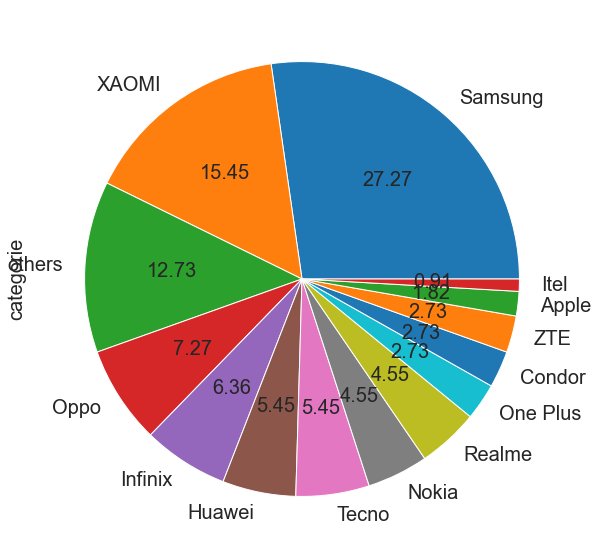

In [452]:
tunisianet['categorie'].value_counts().plot(kind='pie',autopct='%.2f')



<AxesSubplot:>

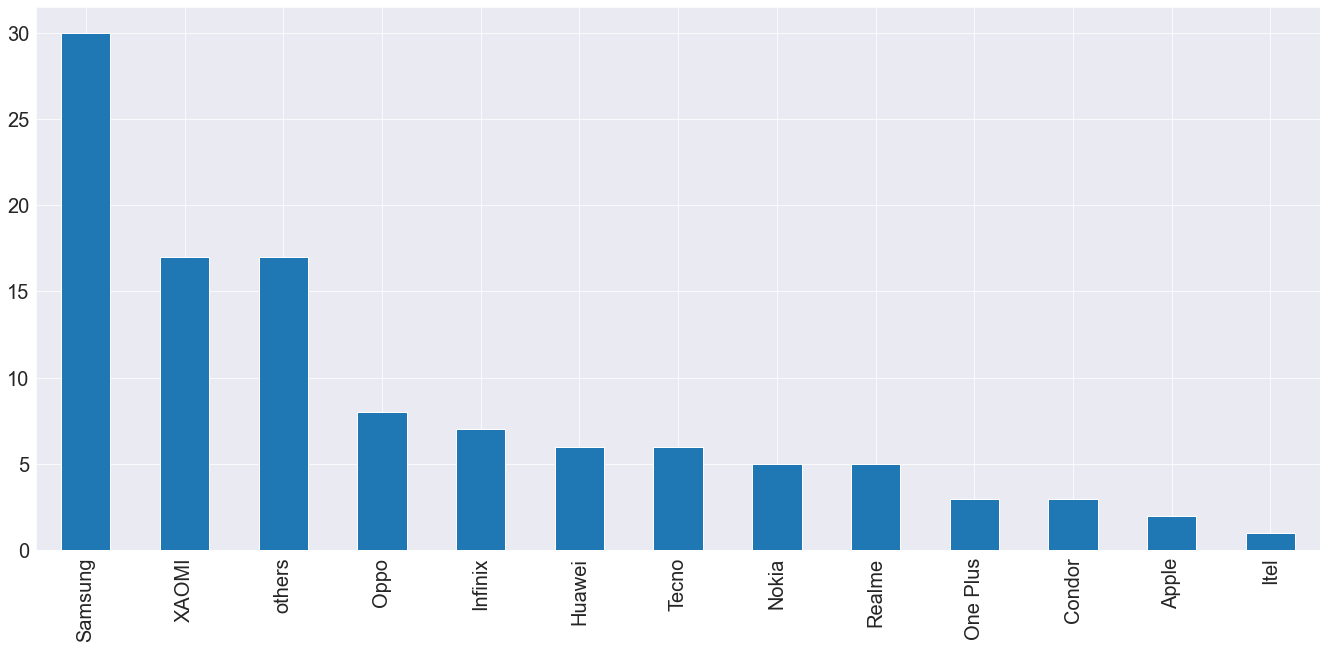

In [404]:
tunisianet['categorie'].value_counts().plot(kind='bar')

C:\Users\Mechi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='categorie', ylabel='prix'>

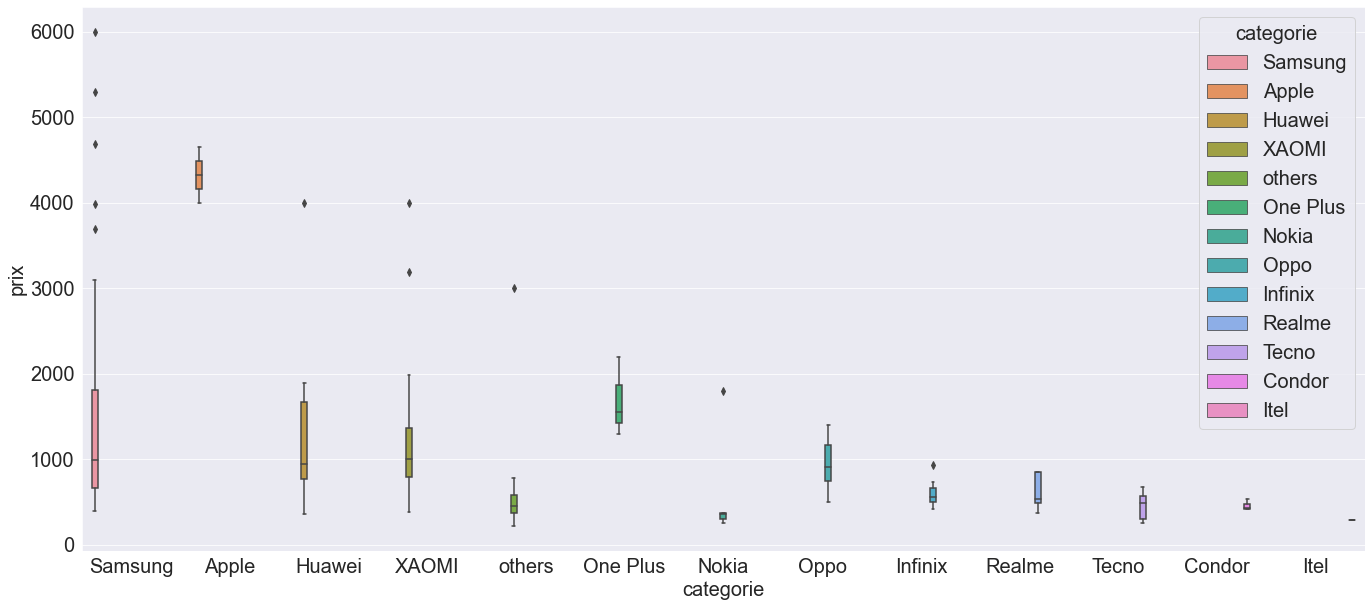

In [405]:
sns.boxplot(tunisianet.categorie, tunisianet.prix, hue=tunisianet.categorie)

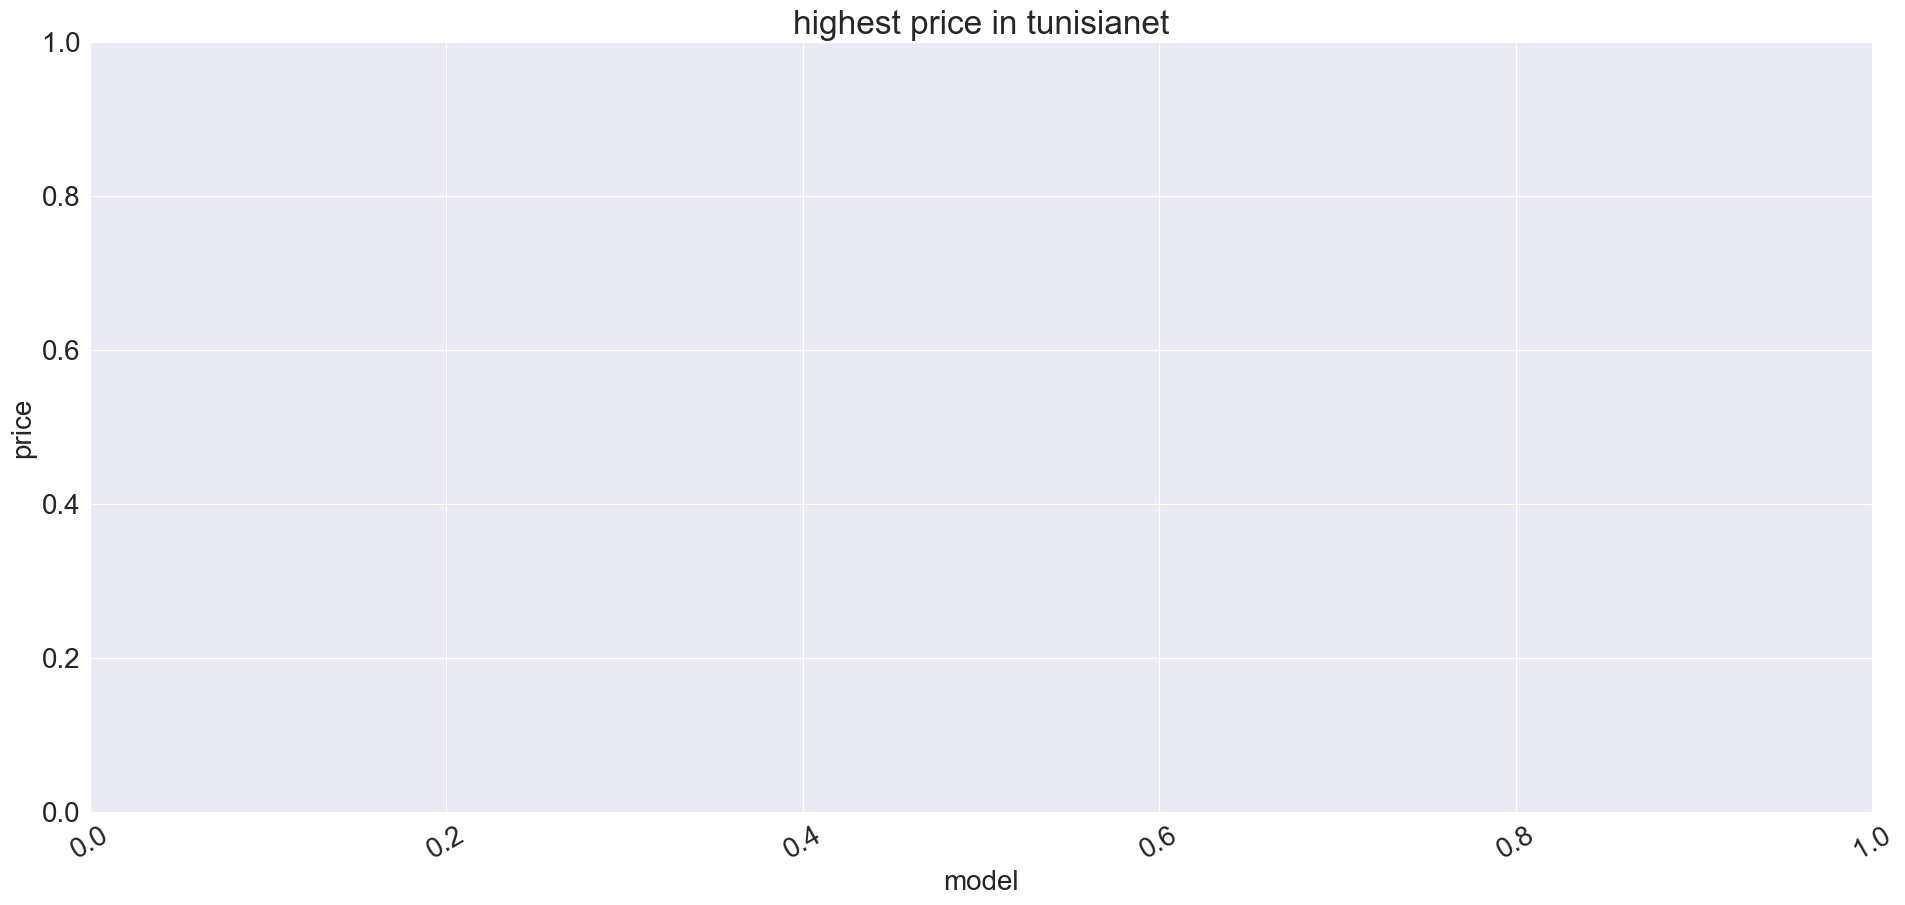

In [35]:
# Create a scatter plot
high=tunisianet.query("`prix`>=3000")
sns.scatterplot(x=high.index, # X-axis
                y=high['prix'],  # Y-axis
                hue=high['categorie'],  # Dot color
                s=100)
plt.xticks(rotation= 30)
# Chart title
plt.xlabel('model'), plt.ylabel('price')
plt.title("highest price in tunisianet")
plt.show();

# 3.Scraping Data from Jumia :

In this phase, we will shift our focus to the Jumia website and begin the process of scraping data from it. Similar to the Tunisianet scraping process, we will extract information on prices, specifications, brands, and models of smartphones from Jumia. By doing so, we aim to create a comparable dataset to analyze and compare with the data obtained from Tunisianet.

## 3.1.Scraping Data :

During this step, we will navigate through the Jumia website, identify the relevant web elements, and extract the desired data programmatically. Through web scraping techniques, we will gather information on the available smartphones, including their prices, specifications, brands, and models.

In [409]:

### Jumia
L=[]
NAME=[]
CARACTERISTIQUE=[]
PRICE=[]
URL=[]
for i in range (1,10):
    jumia=requests.get("https://www.jumia.com.tn/mlp-telephone-tablette/smartphones/?page="+str(i)+"#catalog-listing").text
    soup=BeautifulSoup(jumia,'lxml')
    elts=soup.find_all('article', class_ = 'prd _fb col c-prd')

    for elt in elts:
        info=elt.find('h3',class_='name').text.split('-')
        NAME.append(info[0])
        CARACTERISTIQUE.append("/".join(info[1:]))
        URL.append(elt.find('img')['data-src'])
        #COLOR.append(info[3])
        

        PRICE.append(elt.find('div',class_='prc').text.split()[0].replace(',','').replace('.00',''))




## 3.2Processing & Cleaning Data :

Well! the data has been scraped from Jumia, we will perform processing and cleaning procedures to ensure the dataset's quality and consistency. This will involve handling missing values, addressing formatting issues, and put data in more reliable format.

In [410]:

jumia_df=pd.DataFrame(list(zip(NAME,PRICE,CARACTERISTIQUE,URL)),columns=['name','prix','caractéristique','url'])
jumia_df

,name,prix,caractéristique,url
0,XIAOMI Redmi 9A,359,"6.53"" / 2 Go / 32 Go / Sky Blue / Garantie 1 an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...
1,XIAOMI Redmi 9A,359,"6.53"" / 2 Go / 32 Go / Gray Granite / Garanti...",https://tn.jumia.is/unsafe/fit-in/300x300/filt...
2,Infinix Smart 6,449,"6.6"" / 3 Go / 64 Go / Ocean Blue / Garantie 1 an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...
3,Infinix HOT11 Play,529,"6.82"" / 4G_64G / Sunset Gold / Garantie 1 An",https://tn.jumia.is/unsafe/fit-in/300x300/filt...
4,Infinix Hot 11s,699,"6.78"" / 6 Go / 128 Go / Green Wave / Garantie...",https://tn.jumia.is/unsafe/fit-in/300x300/filt...
...,...,...,...,...
355,Itel Téléphone,269,A17 / Dark blue / Garantie 1 an,https://tn.jumia.is/unsafe/fit-in/300x300/filt...
356,Samsung A52,1499,"6.5"" / 8G / 128G / Blanc / +Power Bank Winx 7...",https://tn.jumia.is/unsafe/fit-in/300x300/filt...
357,XIAOMI Redmi10C,629,"6.71""/ 4Go / 64Go / Ocean Blue / Garantie 1 an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...
358,Samsung Galaxy A03,499,"6.5"" / 3 Go / 32Go / Bleu / Garantie 1 an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...


In [411]:
jumia_df.shape

(360, 4)

In [412]:
jumia_df["prix"]=jumia_df["prix"].astype(float).round().astype(int)
jumia_df.sort_values(by='prix',ascending=False,inplace=True)
jumia_df=jumia_df[jumia_df['prix']>200]
jumia_df.reset_index(inplace=True,drop=True)
jumia_df

,name,prix,caractéristique,url
0,Samsung Galaxy Note20,3499,"6.7"" / 8 Go / 256 Go / Mystic Bronze / Garant...",https://tn.jumia.is/unsafe/fit-in/300x300/filt...
1,Apple IPhone 13,3428,"6.1""/ 128Go / Bleu / Garantie 1 an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...
2,Samsung Z Flip 3,3199,8gb Ram / 256Gb / Creme/ Garantie 1An,https://tn.jumia.is/unsafe/fit-in/300x300/filt...
3,Samsung Galaxy S21 FE 5G,3099,"6.4"" / 8 Go / 256 Go / Lavender / Garantie 1 an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...
4,Samsung Galaxy S21 FE 5G,3099,"6.4"" / 8 Go / 256 Go / Olive / Garantie 1 an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...
...,...,...,...,...
342,Evertek M20S mini,219,1GB RAM+16GB ROM / Green,https://tn.jumia.is/unsafe/fit-in/300x300/filt...
343,Evertek M20S mini,219,1GB RAM+16GB ROM / Red,https://tn.jumia.is/unsafe/fit-in/300x300/filt...
344,Evertek V9 Plus,215,4G / 1Go / 40Go / Double SIM et Pochette + An...,https://tn.jumia.is/unsafe/fit-in/300x300/filt...
345,Itel A16plus,209,"5"" / 1 Go / 8 Go / Noir / Garantie 1 an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...


In [413]:

jumia_df.iloc[1]=["Apple iPhone 12 Pro Max",5050,'128GB Graphite','https://tn.jumia.is/unsafe/fit-in/300x300/filters:fill(white)/product/12/2445/1.jpg?0810']
jumia_df

C:\Users\Mechi\anaconda3\lib\site-packages\pandas\core\indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


,name,prix,caractéristique,url
0,Samsung Galaxy Note20,3499,"6.7"" / 8 Go / 256 Go / Mystic Bronze / Garant...",https://tn.jumia.is/unsafe/fit-in/300x300/filt...
1,Apple iPhone 12 Pro Max,5050,128GB Graphite,https://tn.jumia.is/unsafe/fit-in/300x300/filt...
2,Samsung Z Flip 3,3199,8gb Ram / 256Gb / Creme/ Garantie 1An,https://tn.jumia.is/unsafe/fit-in/300x300/filt...
3,Samsung Galaxy S21 FE 5G,3099,"6.4"" / 8 Go / 256 Go / Lavender / Garantie 1 an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...
4,Samsung Galaxy S21 FE 5G,3099,"6.4"" / 8 Go / 256 Go / Olive / Garantie 1 an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...
...,...,...,...,...
342,Evertek M20S mini,219,1GB RAM+16GB ROM / Green,https://tn.jumia.is/unsafe/fit-in/300x300/filt...
343,Evertek M20S mini,219,1GB RAM+16GB ROM / Red,https://tn.jumia.is/unsafe/fit-in/300x300/filt...
344,Evertek V9 Plus,215,4G / 1Go / 40Go / Double SIM et Pochette + An...,https://tn.jumia.is/unsafe/fit-in/300x300/filt...
345,Itel A16plus,209,"5"" / 1 Go / 8 Go / Noir / Garantie 1 an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...


In [414]:
Itel=[nom for nom in list(jumia_df["name"]) if nom.lower().find('itel')!= -1]
Evertek=[nom for nom in list(jumia_df["name"]) if nom.lower().find('evertek')!= -1]
Apple=[nom for nom in list(jumia_df["name"]) if nom.lower().find('apple')!= -1]
Infinix=[nom for nom in list(jumia_df["name"]) if nom.lower().find('infinix')!= -1]
Samsung=[nom for nom in list(jumia_df["name"]) if nom.lower().find('samsung')!= -1]
Huawei=[nom for nom in list(jumia_df["name"]) if nom.lower().find('huawei')!= -1]
Oppo=[nom for nom in list(jumia_df["name"]) if nom.lower().find('oppo')!= -1]
Tecno=[nom for nom in list(jumia_df["name"]) if nom.lower().find('tecno')!= -1]
Nokia=[nom for nom in list(jumia_df["name"]) if nom.lower().find('nokia')!= -1]
Realme=[nom for nom in list(jumia_df["name"]) if nom.lower().find('realme')!= -1]
XAOMI=[nom for nom in list(jumia_df["name"]) if (nom.lower().find('xiaomi')!= -1 or nom.lower().find('redmi')!= -1)]
One_Plus=[nom for nom in list(jumia_df["name"]) if (nom.lower().find('one plus')!= -1 or nom.lower().find('oneplus')!= -1)]


In [416]:

l=[]
for row in jumia_df.name :
    if row in Apple:
        l.append("Apple")
    elif row in Samsung:
        l.append("Samsung")
    elif row in XAOMI:
        l.append("XAOMI")           
    elif row in Infinix:
        l.append("Infinix")
            
    elif row in Huawei:
        l.append("Huawei")
    elif row in Itel:
        l.append("Itel")
    elif row in Evertek:
        l.append("Evertek")
    elif row in Oppo:
        l.append("Oppo")
    elif row in Nokia:
        l.append("Nokia")
    elif row in Tecno:
        l.append("Tecno")
    elif row in One_Plus:
        l.append("One Plus")
    elif row in Realme:
        l.append("Realme")
    else : 
        l.append("others")
jumia_df.loc[:,'categorie']=l

jumia_df

C:\Users\Mechi\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,name,prix,caractéristique,url,categorie
0,Samsung Galaxy Note20,3499,"6.7"" / 8 Go / 256 Go / Mystic Bronze / Garant...",https://tn.jumia.is/unsafe/fit-in/300x300/filt...,Samsung
1,Apple iPhone 12 Pro Max,5050,128GB Graphite,https://tn.jumia.is/unsafe/fit-in/300x300/filt...,Apple
2,Samsung Z Flip 3,3199,8gb Ram / 256Gb / Creme/ Garantie 1An,https://tn.jumia.is/unsafe/fit-in/300x300/filt...,Samsung
3,Samsung Galaxy S21 FE 5G,3099,"6.4"" / 8 Go / 256 Go / Lavender / Garantie 1 an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...,Samsung
4,Samsung Galaxy S21 FE 5G,3099,"6.4"" / 8 Go / 256 Go / Olive / Garantie 1 an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...,Samsung
...,...,...,...,...,...
342,Evertek M20S mini,219,1GB RAM+16GB ROM / Green,https://tn.jumia.is/unsafe/fit-in/300x300/filt...,Evertek
343,Evertek M20S mini,219,1GB RAM+16GB ROM / Red,https://tn.jumia.is/unsafe/fit-in/300x300/filt...,Evertek
344,Evertek V9 Plus,215,4G / 1Go / 40Go / Double SIM et Pochette + An...,https://tn.jumia.is/unsafe/fit-in/300x300/filt...,Evertek
345,Itel A16plus,209,"5"" / 1 Go / 8 Go / Noir / Garantie 1 an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...,Itel


In [418]:
jumia_df.reset_index(drop=True,inplace=True)

In [419]:
jumia_df.drop(0,inplace=True)


C:\Users\Mechi\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [420]:
jumia_df.drop_duplicates(subset=['prix','categorie'],inplace=True)
jumia_df.reset_index(drop=True,inplace=True)
jumia_df

C:\Users\Mechi\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,name,prix,caractéristique,url,categorie
0,Apple iPhone 12 Pro Max,5050,128GB Graphite,https://tn.jumia.is/unsafe/fit-in/300x300/filt...,Apple
1,Samsung Z Flip 3,3199,8gb Ram / 256Gb / Creme/ Garantie 1An,https://tn.jumia.is/unsafe/fit-in/300x300/filt...,Samsung
2,Samsung Galaxy S21 FE 5G,3099,"6.4"" / 8 Go / 256 Go / Lavender / Garantie 1 an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...,Samsung
3,Apple iPhone 11 64 Go,2398,Noir / Garantie 1 an,https://tn.jumia.is/unsafe/fit-in/300x300/filt...,Apple
4,One Plus OP8,2099,"6.55""/ 8Go / 128Go / Interstellar Glow / Gara...",https://tn.jumia.is/unsafe/fit-in/300x300/filt...,One Plus
...,...,...,...,...,...
209,Benco Y30,227,"3G / DS / 5.71"" / 1G 32G / Blue / Garantie 1an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...,others
210,Itel A17,219,"5"" / 1 Go / 16 Go / Dark Blue / Garantie 1 an",https://tn.jumia.is/unsafe/fit-in/300x300/filt...,Itel
211,Evertek M20S mini,219,1GB RAM+16GB ROM / Green,https://tn.jumia.is/unsafe/fit-in/300x300/filt...,Evertek
212,Evertek V9 Plus,215,4G / 1Go / 40Go / Double SIM et Pochette + An...,https://tn.jumia.is/unsafe/fit-in/300x300/filt...,Evertek


In [421]:
Itel=[nom for nom in list(jumia_df["name"]) if nom.lower().find('itel')!= -1]
Evertek=[nom for nom in list(jumia_df["name"]) if nom.lower().find('evertek')!= -1]
Apple=[nom for nom in list(jumia_df["name"]) if nom.lower().find('apple')!= -1]
Infinix=[nom for nom in list(jumia_df["name"]) if nom.lower().find('infinix')!= -1]
XAOMI=[nom for nom in list(jumia_df["name"]) if (nom.lower().find('xiaomi')!= -1 or nom.lower().find('redmi')!= -1)]
Samsung=[nom for nom in list(jumia_df["name"]) if nom.lower().find('samsung')!= -1]
Huawei=[nom for nom in list(jumia_df["name"]) if nom.lower().find('huawei')!= -1]
Oppo=[nom for nom in list(jumia_df["name"]) if nom.lower().find('oppo')!= -1]
Tecno=[nom for nom in list(jumia_df["name"]) if nom.lower().find('tecno')!= -1]
Nokia=[nom for nom in list(jumia_df["name"]) if nom.lower().find('nokia')!= -1]
Realme=[nom for nom in list(jumia_df["name"]) if nom.lower().find('realme')!= -1]

One_Plus=[nom for nom in list(jumia_df["name"]) if (nom.lower().find('one plus')!= -1 or nom.lower().find('oneplus')!= -1)]


In [422]:
jumia_df.set_index('name',inplace=True)

In [423]:
# dataFrame per Marque
Apple_df=jumia_df.loc[Apple]
Samsung_df=jumia_df.loc[Samsung]
XAOMI_df=jumia_df.loc[XAOMI]
Infinix_df=jumia_df.loc[Infinix]
Huawei_df=jumia_df.loc[Huawei]
Itel_df=jumia_df.loc[Itel]
Oppo_df=jumia_df.loc[Oppo]
Nokia_df=jumia_df.loc[Nokia]
Tecno_df=jumia_df.loc[Tecno]


In [424]:
def affiche(data_df):

   
    print("les modèles de "+ str(list(data_df.index)[0].split()[0])+" sont:\n",data_df['prix'],'\n')
    nombre=len(data_df)
    print("le nombre de produit"+ str(data_df)+"est : ",nombre)
    print("le telephone le plus couteux est:\n ", data_df[data_df['prix']==int(data_df['prix'].max())]['prix'])
    print("le telephone le plus couteux est:\n ", data_df[data_df['prix']==int(data_df['prix'].min())]['prix'])


In [425]:
affiche(Apple_df)

les modèles de Apple sont:
 name
Apple iPhone 12 Pro Max    5050
Apple iPhone 11 64 Go      2398
Name: prix, dtype: int32 

le nombre de produit                         prix        caractéristique  \
name                                                   
Apple iPhone 12 Pro Max  5050         128GB Graphite   
Apple iPhone 11 64 Go    2398   Noir / Garantie 1 an   

                                                                       url  \
name                                                                         
Apple iPhone 12 Pro Max  https://tn.jumia.is/unsafe/fit-in/300x300/filt...   
Apple iPhone 11 64 Go    https://tn.jumia.is/unsafe/fit-in/300x300/filt...   

                        categorie  
name                               
Apple iPhone 12 Pro Max     Apple  
Apple iPhone 11 64 Go       Apple  est :  2
le telephone le plus couteux est:
  name
Apple iPhone 12 Pro Max    5050
Name: prix, dtype: int32
le telephone le plus couteux est:
  name
Apple iPhone 11 64 Go     2

## 3.3.Exploratory Data Analysis :

In this phase, we will conduct exploratory data analysis (EDA) on the Jumia dataset. By utilizing statistical measures, visualizations, and summary statistics, we will gain insights into the distribution of smartphone prices, the prevalence of different brands and models, and any significant patterns or trends within the data. 

<AxesSubplot:ylabel='categorie'>

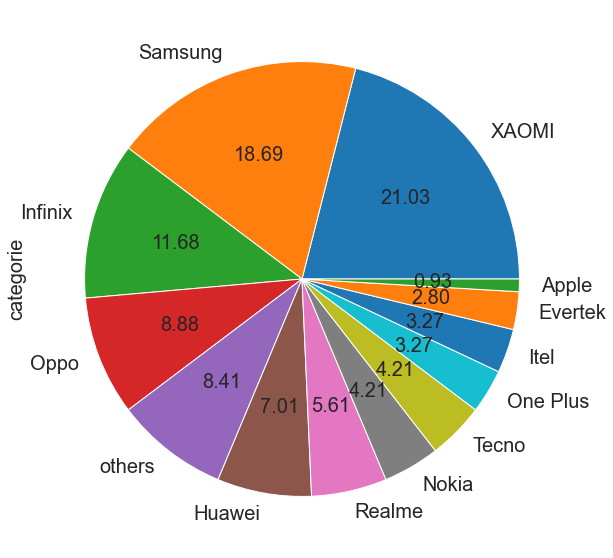

In [426]:
jumia_df['categorie'].value_counts().plot(kind='pie',autopct='%.2f')


<AxesSubplot:>

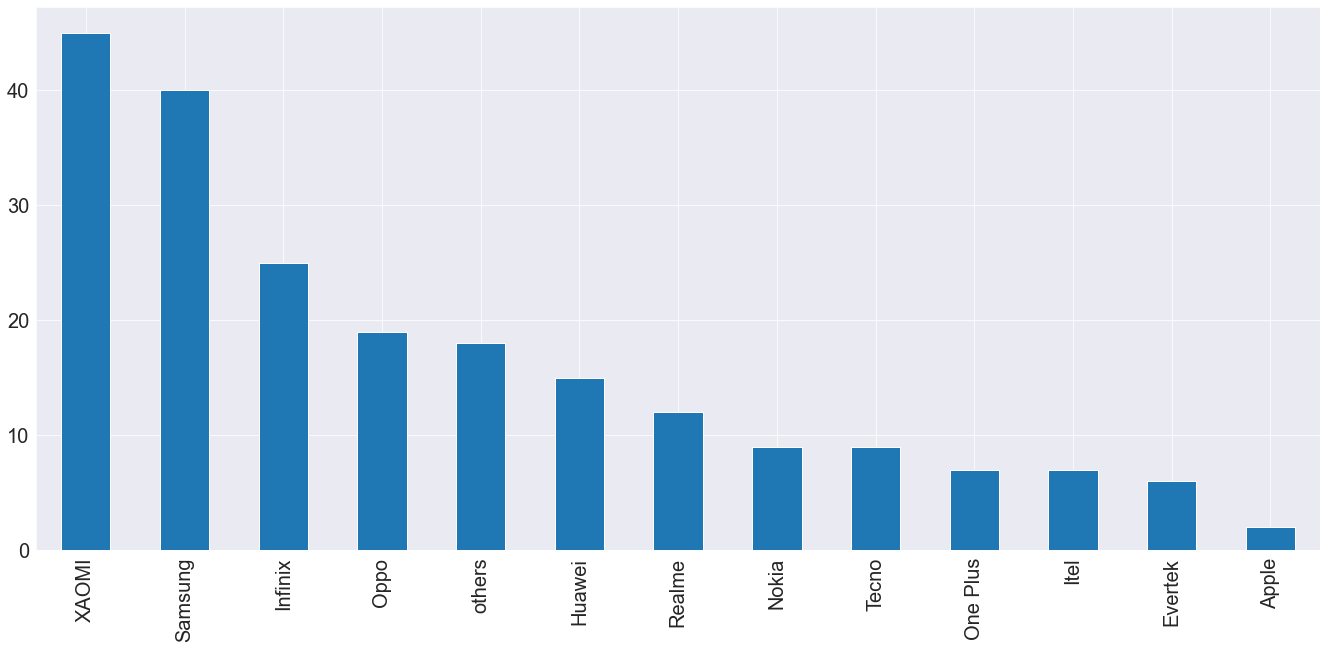

In [427]:
jumia_df['categorie'].value_counts().plot(kind='bar')

C:\Users\Mechi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='categorie', ylabel='prix'>

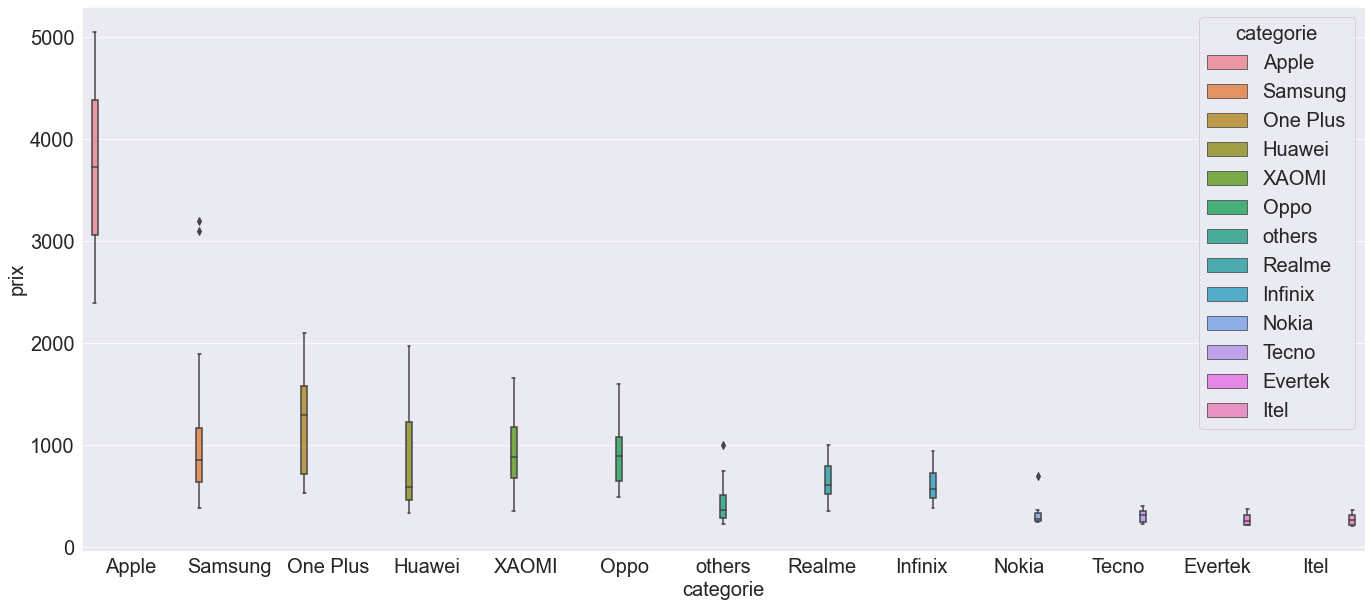

In [428]:
sns.boxplot(jumia_df.categorie, jumia_df.prix, hue=jumia_df.categorie)

C:\Users\Mechi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


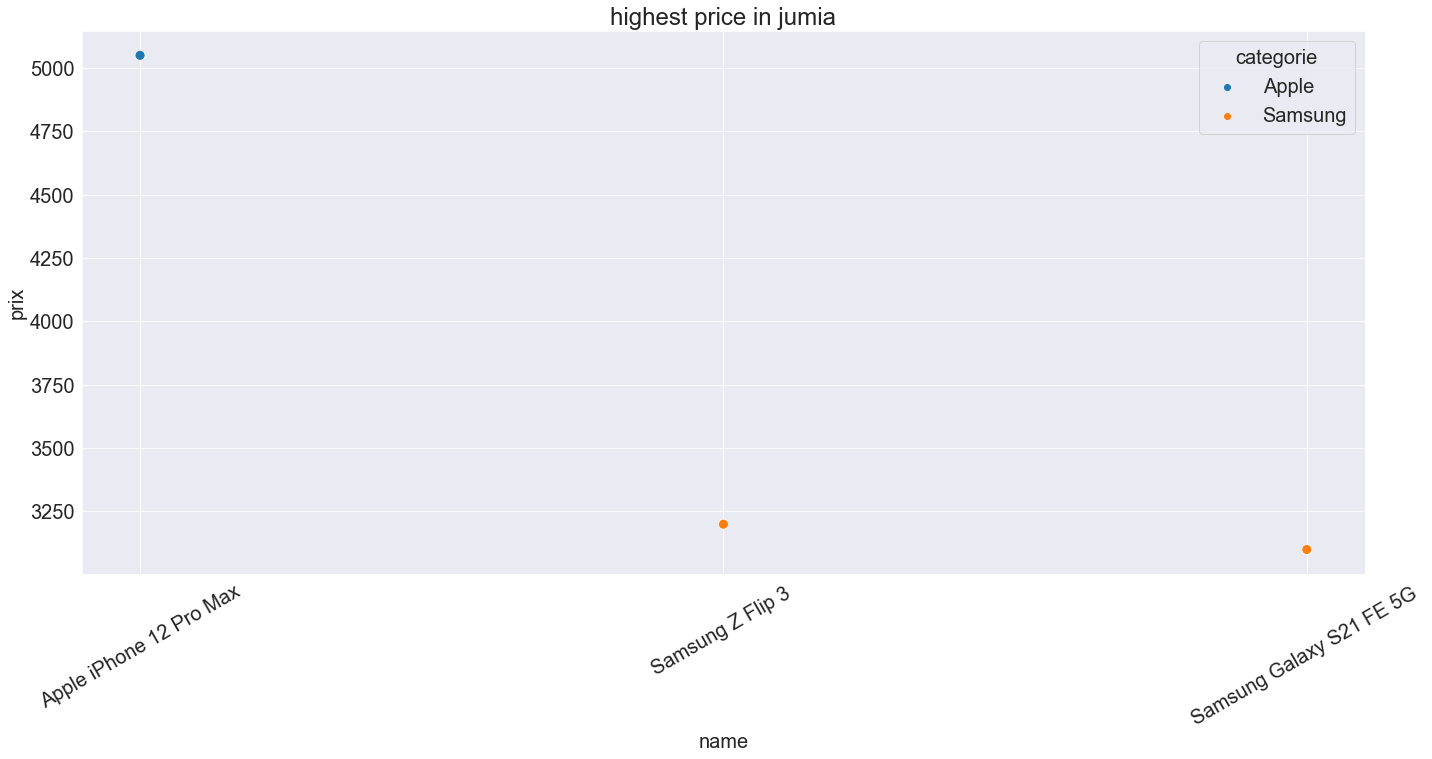

In [430]:
# Create a scatter plot
high=jumia_df[jumia_df['prix']>3000  ]
sns.scatterplot(high.index, # X-axis
                high['prix'],  # Y-axis
                hue=high['categorie'],  # Dot color
                s=100);
plt.xticks(rotation=30)
# Chart title
plt.title("highest price in jumia");

<AxesSubplot:>

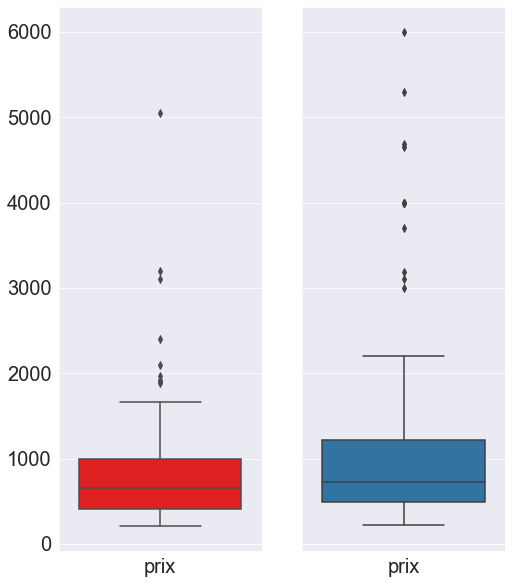

In [431]:

_, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 10))
sns.boxplot(data=jumia_df,ax=axes[0],color='r')
sns.boxplot(data=tunisianet,ax=axes[1])


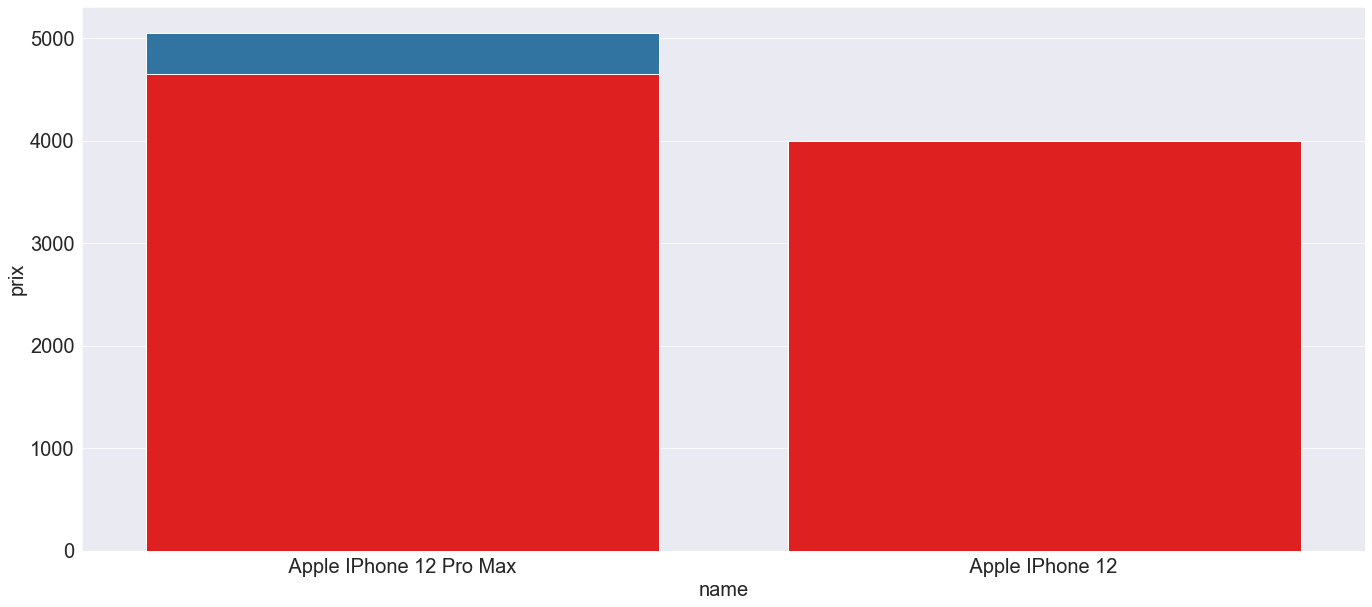

In [432]:
App=pd.concat([Apple_df,Apple_tn_df])
sns.barplot(x=Apple_df.index,y='prix',data=Apple_df)
sns.barplot(x=Apple_tn_df.index,y='prix',data=Apple_tn_df,color='r',order=Apple_tn_df.index,dodge=False)

#plt.plot(Apple_tn_df.index,Apple_tn_df['prix'], 'r--o', linewidth=4, markersize=12, markeredgewidth=4)
plt.show()

# 4.Comparative Analysis :

In this phase, we will perform a comparative analysis between the datasets obtained from Tunisianet and Jumia. We will explore and compare various aspects, including overall trends in smartphone prices, brand popularity, model availability, and other relevant factors.

## 4.1.General Comparition :

In this sub-phase of the comparative analysis, we will examine the general trends and patterns observed in both datasets.

In [433]:
jumia_df.reset_index(inplace=True)


In [434]:
tunisianet.reset_index(inplace=True)


In [435]:
jumia_df['site']=['jumia' for i in range(len(jumia_df))]

C:\Users\Mechi\AppData\Local\Temp/ipykernel_12420/679453025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jumia_df['site']=['jumia' for i in range(len(jumia_df))]


In [436]:
tunisianet['site']=['tunisianet' for i in range(len(tunisianet))]

In [437]:
alll=pd.concat([tunisianet,jumia_df])

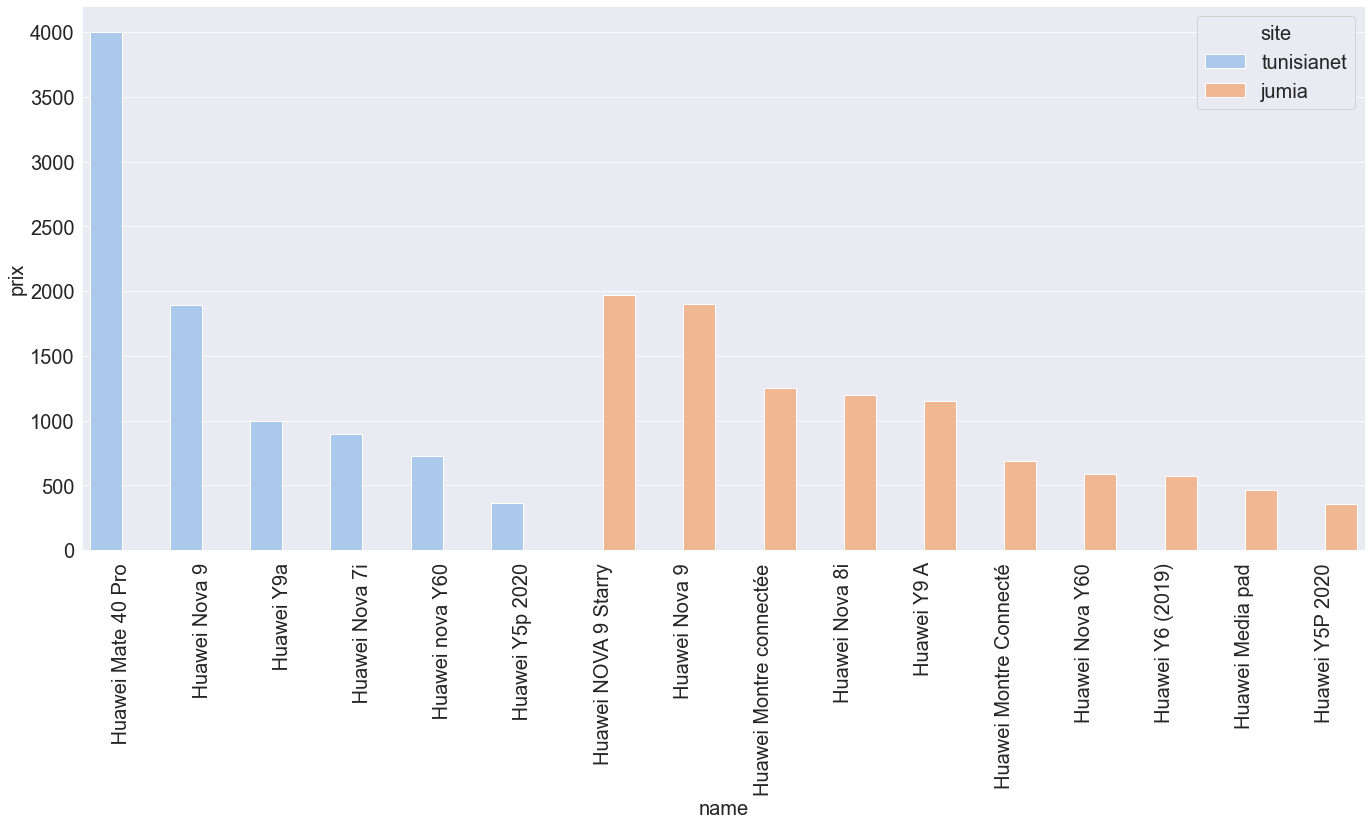

In [438]:
data=alll.where(alll.categorie=='Huawei')
sns.barplot(x=data['name'],y=data['prix'],hue=data['site'],ci=None,palette='pastel')
plt.xticks(rotation=90 )
plt.show()

<AxesSubplot:xlabel='categorie', ylabel='count'>

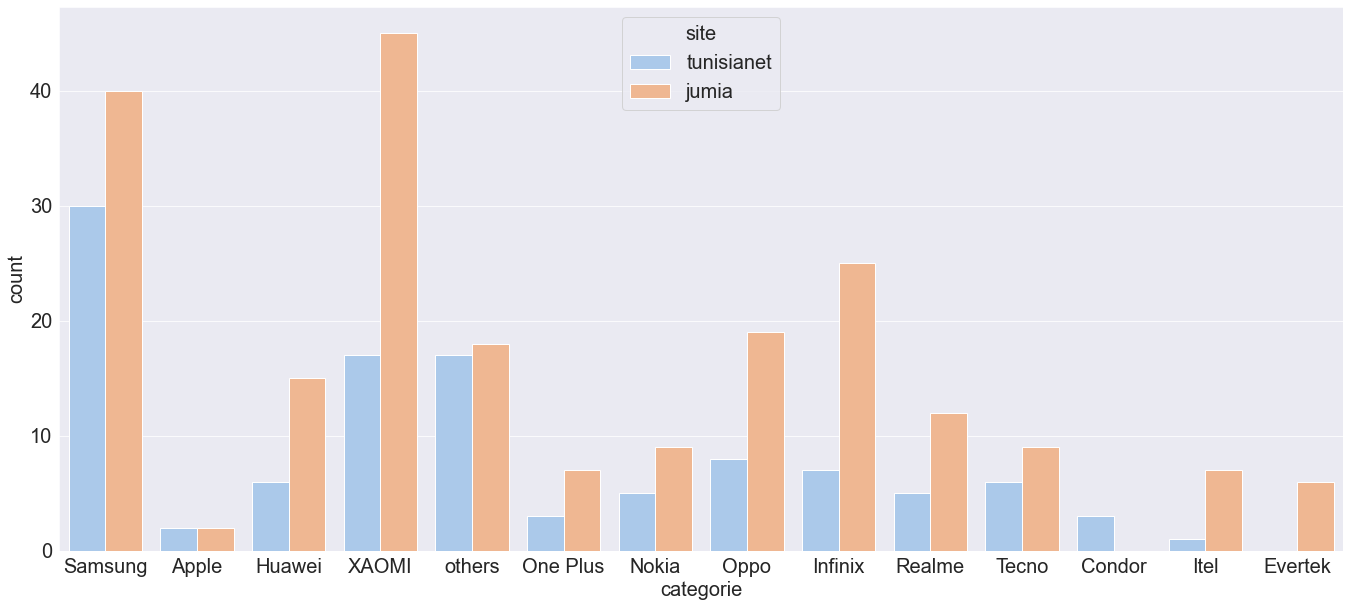

In [439]:
sns.countplot(x ='categorie', data = alll,hue='site',palette='pastel')

<AxesSubplot:xlabel='categorie', ylabel='prix'>

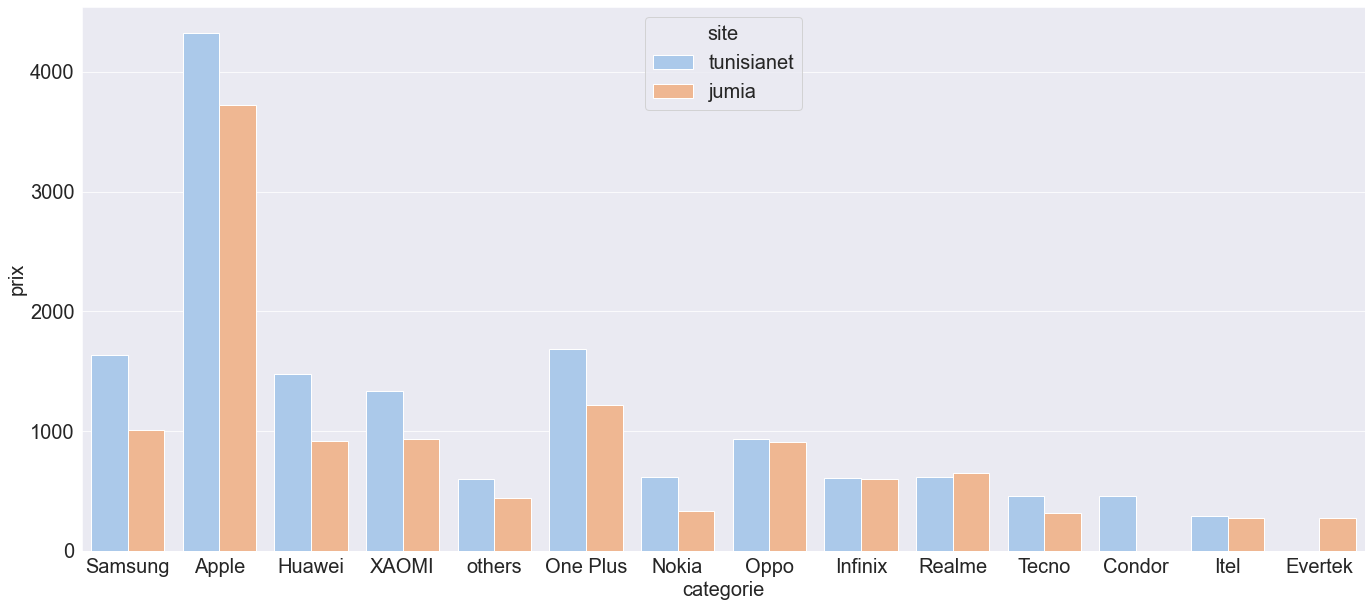

In [440]:
sns.barplot(x=alll['categorie'],y=alll['prix'],hue=alll['site'],ci=None,palette='pastel')


## 4.2.Comparition by Product :

In this sub-phase, we will focus on specific smartphone models or product categories and compare their characteristics, pricing, and availability on Tunisianet and Jumia. By drilling down into specific products, we aim to uncover insights into the differences in pricing strategies, brand availability, 

C:\Users\Mechi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

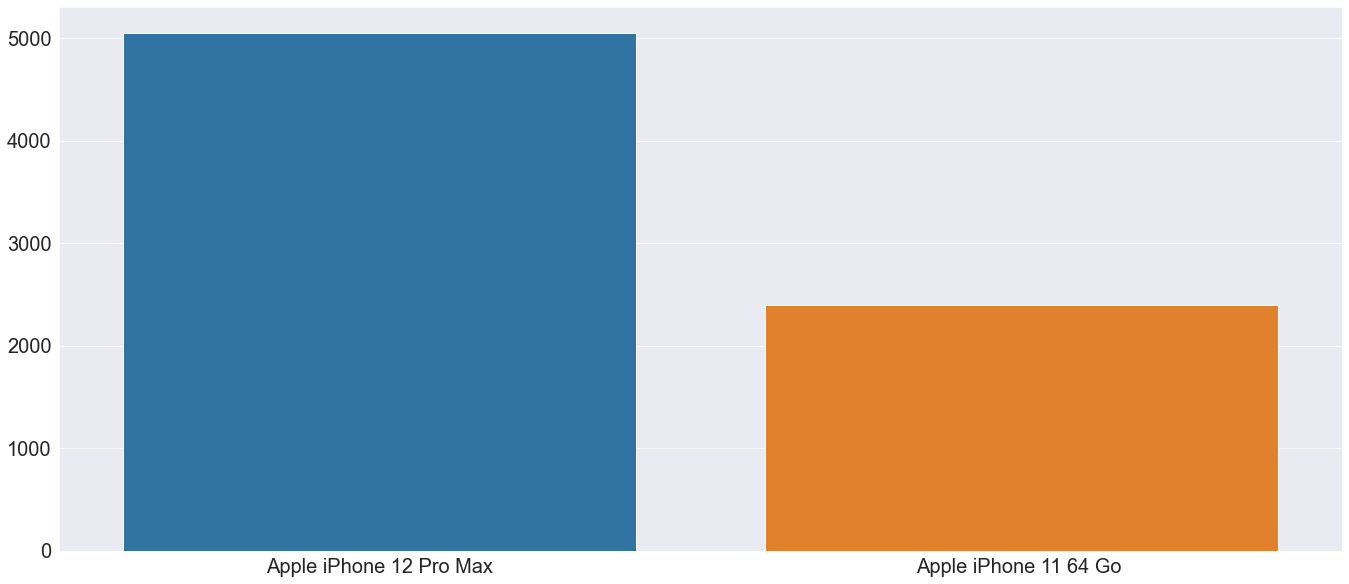

In [444]:
sns.barplot([Apple_df.index[0],Apple_df.index[-1]],[Apple_df['prix'].max(),Apple_df['prix'].min()])


In [445]:
def stat(data):
    sns.catplot([data.index[0],'mean',data.index[-1]],col=data['site'][data['prix'].max(),data['prix'].mean(),data['prix'].min()],palette='pastel')
    
stat(Samsung_df)

SyntaxError: positional argument follows keyword argument (3745270543.py, line 2)

C:\Users\Mechi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


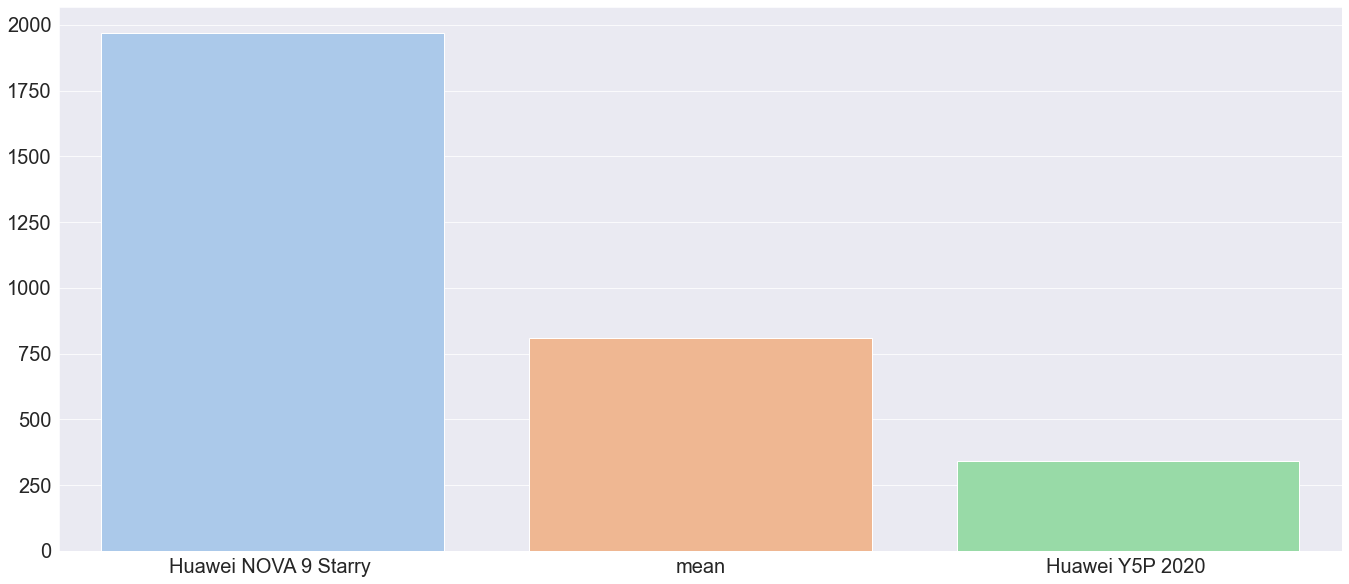

In [446]:
stat(Huawei_df)

In [473]:
alll.to_excel(r'C:\Users\Mechi\Desktop\all.xlsx',sheet_name='sheet1',index=False)

# 5.Conclusion :

In this sub-phase, we will focus on specific smartphone models or product categories and compare their characteristics, pricing, and availability on Tunisianet and Jumia. By drilling down into specific products, we aim to uncover insights into the differences in pricing strategies, brand availability, 